# PageRank算法

**如果一个网页被很多其他网页链接到的话说明这个网页比较重要，也就是PageRank值会相对较高**

**如果一个PageRank值很高的网页链接到一个其他的网页，那么被链接到的网页的PageRank值会相应地因此而提高**

### 公式

$$Pr = \alpha \cdot S \cdot p+\frac{1 - \alpha}{ N }$$

#### 其中 $\alpha$ 表示用户点击网页跳转链接的概率，$1-\alpha$ 表示用户通过地址栏跳转网页的概率。S表示的是网页之间的链接状态矩阵，p为网页的pr值矩阵，通过迭代，最终收敛。N为网页总数。

In [98]:
import numpy as np


def pagerank(S, d=0.85, r=0.0001):

    N = S.shape[0]
    e = np.ones((N, 1))
    p0 = 1./N * e #初始化网页的pr值，一般为1/N
    p1 = e
    while np.sum(np.abs(p1-p0)) > r:
        p0, p1 = p1, d * np.dot(S, p0) + (1.-d)/N * e
    return N, p1

S = np.array([[0,1./2,0,0],
            [1./3,0,0,1./2],
            [1./3,0,1,1./2],
            [1./3,1./2,0,0]])

N, p = pagerank(S)

for i in range(N):
    print("pr({0}) = {1}".format(i+1, p[i]))

pr(1) = [0.08249313]
pr(2) = [0.10586618]
pr(3) = [0.70586571]
pr(4) = [0.10586618]


### 验证

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

In [28]:
G = nx.DiGraph()

In [74]:
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)

In [75]:
G.add_edges_from([(1,2),(1,3),(1,4)])
G.add_edges_from([(2,1),(2,4)])
G.add_edge(3,3)
G.add_edges_from([(4,2),(4,3)])
G.edges()

OutEdgeView([(1, 2), (1, 3), (1, 4), (2, 1), (2, 4), (3, 3), (4, 2), (4, 3)])

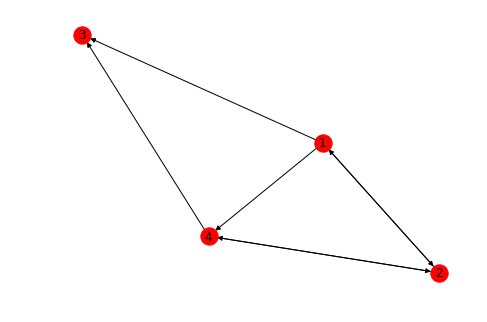

In [88]:
nx.draw(G,with_labels = True )

In [95]:
pr = nx.pagerank(G)

In [96]:
pr

{1: 0.08249385196501903,
 2: 0.10586723648212554,
 3: 0.7057716750707297,
 4: 0.10586723648212554}

### GOOGLE数据测试

数据集拥有875713个节点和5105039条边。形式如下所示：

### 代码

In [ ]:
from time import time
import networkx as nx


begin = time()
e = []
with open('D:\WorkSpace\Python\web-Google.txt') as f:
    for line in f:
        o = tuple(line.split())
        e.append(o)

A = nx.DiGraph()
A.add_edges_from(e) #将数据集转换为权值图
p = nx.pagerank_scipy(A)

end = time()

count = 0
for key in p:
    if count < 10:
        print('p[{0}] = {1}'.format(key, p[key]))
        count += 1
    else:
        break
        
print("time = {0}".format(end - begin))

结果如图所示，取前十个结果。